##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [279]:
########################################
#Hello World
########################################


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("Train.csv", sep=',')
train_data.drop(train_data.filter(regex="Unname"),axis = 1,inplace=True)
test_data = pd.read_csv("Test.csv", sep=',')
X,y = train_data['text'],train_data['sentiment']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.28)

In [190]:
import nltk
from bs4 import BeautifulSoup
import re
import unidecode
from nltk.tokenize import TweetTokenizer
from string import punctuation
import contractions
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True) 
ps = nltk.PorterStemmer()
wordnet = nltk.WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')
stopwords = []
# exclude words from stopwords list
for i in stop_words:
    if i != 'not' and i != 'no':
        stopwords.append(i)

In [253]:
def remove_links(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

def remove_email(text):
    return re.sub(r'[\.a-zA-Z0-9_-]*@[\.a-zA-Z0-9_-]*', '', text)


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text
def remove_num(text):
    return ''.join([i for i in text if not i.isdigit()])
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_stopwords(text):
    return ' '.join([wordnet.lemmatize(i) for i in text.split() if i not in stopwords])

def remove_punc(text):
    return ''.join([i.casefold() for i in text if i not in punctuation])

def remove_num(text):
    return ''.join([i for i in text if not i.isdigit()])

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


#  ps.stem(word)

def remove_not_alpha(text):
    return re.sub(r'[^\s\.a-zA-Z0-9_-]+', '', text)

def preprocess(text):
    
#     text = text.replace(r'\n','').replace(r'\m','').replace(r'\r','').replace(r'\t','') 
    no_email = remove_email(text)
    no_accented_chars = remove_accented_chars(no_email)
    no_links = remove_links(no_accented_chars) 
    no_white_space = remove_whitespace(no_links)
    no_punc = remove_punc(no_white_space)  
    no_contractions = expand_contractions(no_punc)
    no_html_tags = strip_html_tags(no_contractions)
    no_num = remove_num(no_html_tags)
    no_stopwords = remove_stopwords(no_num)
    no_alpha = remove_not_alpha(no_stopwords)
    tok = tknzr.tokenize(no_alpha)
    return " ".join([ps.stem(word) for word in tok])

def prepare(text): 
    res = []
    for line in text:
        line = preprocess(line) 
        res.append(line)
      
    return res    
X_train = prepare(X_train)
X_valid = prepare(X_valid)    


In [244]:
X_valid

['want live world vanessa hudgen zac efron get back togeth',
 'kani west speech like bro time st watch might nut watch back made sen kani',
 'mannn kendrick may better futur would rather listen futur day week',
 'go sad may well sad milan',
 'villag northeast countri tuesday suspect boko haram milit burn hou',
 'not like john kasich rise poll nd nh pick endor yet no coverag',
 'download naruto last ill rewatch tomorrow class',
 'pelosi broaden leadership team fight retain post',
 'kendrick lamar go black friday repeat sinc came gah damn',
 'dr murray open tomorrow morn drmurray need help',
 'signif sept th announcingrelea thing',
 'head th amateur paul dunn still share theopen lead live',
 'mesut ozil ultim xi cristiano ronaldo make arsen arsenalfc',
 'bearakeet burtl draggl penguala sale dm gone hatchim hatchim blackfridayap',
 'societi gutless lawless without deter death penaltyfeel sorri butcher child insan',
 'ladi cougar soccer v milan goal minut left st half',
 'dayafterthanksgiv

In [250]:
from sklearn.feature_extraction.text import CountVectorizer
BoW_vectorizer = CountVectorizer(ngram_range=(1,2))

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(X_train)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW = BoW_vectorizer.transform(X_valid)
X_train_BoW.shape

(15697, 127410)

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(X_valid)
X_train_tfidf.shape

(15697, 127405)

In [274]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=1000)
x_train_chi = selector.fit_transform(X_train_BoW ,y_train)
x_test_chi = selector.transform(X_test_BoW)

In [227]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=5000)
x_train_f = selector.fit_transform(X_train_tfidf,y_train)
x_test_f = selector.transform(X_test_tfidf)

In [85]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold= 0.0001)
x_var_train = selector.fit_transform(X_train_BoW)
x_var_test = selector.fit_transform(X_test_BoW)
x_var_train.shape

(15697, 19638)

Baseline-Model

In [155]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent')
model = clf.fit(x_train_chi,y_train)
model.score(x_test_chi,y_valid)

0.5867321867321867

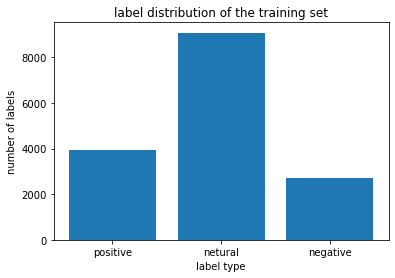

In [156]:
import matplotlib.pyplot as plt
import collections
counter = dict(collections.Counter(y_train))
label = ['positive','netural','negative']
data = [counter['positive'],counter['neutral'],counter['negative']]
plt.bar(label, data)
plt.title('label distribution of the training set')
plt.xlabel('label type')
plt.ylabel('number of labels')
plt.show()

Logistic Regression

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(solver= 'sag', C = 0.5).fit(x_train_chi, y_train)
y_train_predicted = lr.predict(x_train_chi)
print("training accuracy ", np.mean(y_train_predicted == y_train))
lr_acc = np.mean(cross_val_score(lr,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ' ,lr_acc)
# y_predicted = lr.predict(x_test_chi)
print('prediction accuracy: ',lr.score(x_test_chi, y_valid))


training accuracy  0.7562591578008536
validation accuracy:  0.6402948402948403
prediction accuracy:  0.6689598689598689


In [57]:
from sklearn.model_selection import GridSearchCV
parameters_lr = {'solver':('newton-cg','lbfgs','sag','saga'),'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'multi_class':('auto','ovr','multinomial')}
lr = LogisticRegression()
p = GridSearchCV(lr,parameters_lr)
p.fit(x_train_chi,y_train)


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heyonglin/opt/anaconda3

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ('auto', 'ovr', 'multinomial'),
                         'solver': ('newton-cg', 'lbfgs', 'sag', 'saga')})

In [59]:
p.best_params_

{'C': 1, 'multi_class': 'auto', 'solver': 'saga'}

In [275]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(x_train_chi, y_train)
y_train_predicted = nb.predict(x_train_chi)
print("training accuracy ", np.mean(y_train_predicted == y_train))
nb_acc = np.mean(cross_val_score(nb,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ' ,nb_acc)
print('prediction accuracy: ',nb.score(x_test_chi, y_valid))


training accuracy  0.6866280180926292
validation accuracy:  0.6257166257166258
prediction accuracy:  0.6303030303030303


In [266]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", C = 10, gamma = 0.01).fit(x_train_chi, y_train)
y_train_predicted = clf.predict(x_train_chi)
print("training accuracy ", np.mean(y_train_predicted == y_train))
clf_acc = np.mean(cross_val_score(clf,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ' ,clf_acc)
# y_predicted = lr.predict(x_test_chi)
print('prediction accuracy: ',clf.score(x_test_chi, y_valid))

training accuracy  0.7117920621774861
validation accuracy:  0.6479934479934479
prediction accuracy:  0.6658476658476659


In [199]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={"C":[0.01,0.1, 1, 10,100], "gamma":[1, 0.1, 0.01]}, cv=4)  
grid.fit(x_train_chi, y_train)



GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01]})

In [203]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [242]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators = 300 ).fit(x_train_chi, y_train)
# y_train_predicted = tree.predict(x_train_chi)
# print("training accuracy ", np.mean(y_train_predicted == y_train))
tree_acc = np.mean(cross_val_score(tree,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ' ,tree_acc)
print('prediction accuracy: ',tree.score(x_test_chi, y_valid))

validation accuracy:  0.6370188370188371
prediction accuracy:  0.6181818181818182


In [103]:
grid_pram = {
    "n_estimators": [100,200,300],
    'criterion':['gini','entropy'],
    'max_features':['auto','log2']    

}
grid_search = GridSearchCV(tree ,grid_pram,cv =5, n_jobs=-1, verbose=3 )
grid_search.fit(x_train_chi, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.621 total time= 1.8min
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.616 total time= 1.8min
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.619 total time= 1.8min
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.617 total time= 1.8min
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.613 total time= 1.8min
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.622 total time= 3.6min
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.620 total time= 3.6min
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.617 total time= 3.7min
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.620 total time= 3.7min
[CV 5/5] END criterion=gini, max_features=auto, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [104]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimator = []


In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

t0 = time.time()
lr = LogisticRegression(solver='sag',multi_class='multinomial',C = 0.8, max_iter=200 ).fit(x_train_chi, y_train)
t1 = time.time()-t0
print("Excution time of logtistic regression classifier: {} s". format(round(t1,3)))

lr_acc = np.mean(cross_val_score(lr,x_test_chi,y_valid,cv=5))
print('validation accuracy: ',lr_acc)
y_train_predicted = lr.predict(x_train_chi)
print('Training accuracy: ', np.mean(y_train_predicted == y_train))

y_pred = lr.predict(x_test_chi)
precision = precision_score(y_valid, y_pred, average="macro")
print('Macro Precision: %f ' % precision)
recall = recall_score(y_valid, y_pred, average="macro")
print('Macro Recall: %f ' % recall)
f1 = f1_score(y_valid, y_pred, average="macro")
print('Macro F1 score: %f ' % f1)

precision = precision_score(y_valid, y_pred, average="weighted")
print('Weighted Precision: %f ' % precision)
recall = recall_score(y_valid, y_pred, average="weighted")
print('Weighted Recall: %f ' % recall)
f1 = f1_score(y_valid, y_pred, average="weighted")
print('Weighted F1 score: %f ' % f1)


Excution time of logtistic regression classifier: 1.002 s
validation accuracy:  0.6332514332514332
Training accuracy:  0.9904440338918264
Macro Precision: 0.675531 
Macro Recall: 0.496441 
Macro F1 score: 0.519627 
Weighted Precision: 0.666291 
Weighted Recall: 0.657330 
Weighted F1 score: 0.614970 


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


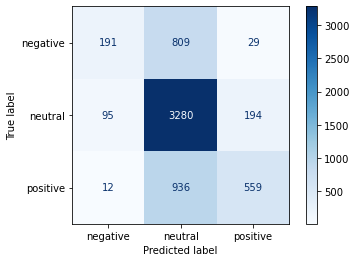

In [130]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,x_test_chi, y_valid, cmap = plt.cm.Blues )
plt.show()

In [128]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

t0 = time.time()
clf = SVC(kernel="rbf", C = 10, gamma = 0.01).fit(x_train_chi, y_train)
t1 = time.time()-t0
print("Excution time of SVM classifier: {} s". format(round(t1,3)))


clf_acc = np.mean(cross_val_score(clf,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ',clf_acc)
y_train_predicted = clf.predict(x_train_chi)
print('Training accuracy: ', np.mean(y_train_predicted == y_train))


y_pred = clf.predict(x_test_chi)
precision = precision_score(y_valid, y_pred, average="macro")
print('Macro Precision: %f ' % precision)
recall = recall_score(y_valid, y_pred, average="macro")
print('Macro Recall: %f ' % recall)
f1 = f1_score(y_valid, y_pred, average="macro")
print('Macro F1 score: %f ' % f1)

precision = precision_score(y_valid, y_pred, average="weighted")
print('Weighted Precision: %f ' % precision)
recall = recall_score(y_valid, y_pred, average="weighted")
print('Weighted Recall: %f ' % recall)
f1 = f1_score(y_valid, y_pred, average="weighted")
print('Weighted F1 score: %f ' % f1)

Excution time of SVM classifier: 22.011 s
validation accuracy:  0.6347256347256348
Training accuracy:  0.9942027138943748
Macro Precision: 0.593479 
Macro Recall: 0.400209 
Macro F1 score: 0.383905 
Weighted Precision: 0.603405 
Weighted Recall: 0.610647 
Weighted F1 score: 0.525087 


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


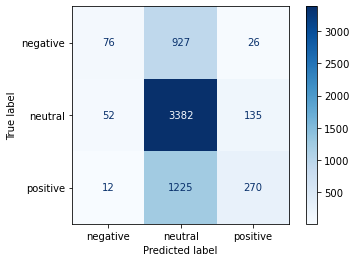

In [129]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test_chi, y_valid, cmap = plt.cm.Blues )
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators = 200, ).fit(x_train_chi, y_train)
# y_train_predicted = tree.predict(x_train_chi)
# print("training accuracy ", np.mean(y_train_predicted == y_train))
tree_acc = np.mean(cross_val_score(tree,x_test_chi,y_valid,cv = 5))
print('validation accuracy: ' ,tree_acc)
print('prediction accuracy: ',tree.score(x_test_chi, y_valid))